## First Train Model

    โดยในการบ้านครั้งนี้เราได้เลือกใช้ชุดข้อมูลของ Credit Card Churn Prediction


In [78]:
import pandas as pd
df = pd.read_csv('credit_card_churn.csv', sep= ",")
df.head()


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

    เริ่มต้นจะทำการลบ 2 คลอลัมน์สุดท้ายตามคำแนะนำจากโจทย์

In [79]:
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',axis=1, inplace=True)
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',axis=1, inplace=True)

**Missing Value**
    ทำการตรวจจับหาค่า NA ในทุกๆตัวในตาราง

In [80]:
#Checking missing value
df.isnull()

CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0          False           False         False   False            False   
1          False           False         False   False            False   
2          False           False         False   False            False   
3          False           False         False   False            False   
4          False           False         False   False            False   
...          ...             ...           ...     ...              ...   
10122      False           False         False   False            False   
10123      False           False         False   False            False   
10124      False           False         False   False            False   
10125      False           False         False   False            False   
10126      False           False         False   False            False   

       Education_Level  Marital_Status  Income_Category  Card_Category  \
0                False           False            False          False   
1                False           False            False          False   
2                False           False            False          False   
3                False           False            False          False   
4                False           False            False          False   
...                ...             ...              ...            ...   
10122            False           False            False          False   
10123            False           False            False          False   
10124            False           False            False          False   
10125            False           False            False          False   
10126            False           False            False          False   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0               False  ...                   False                  False   
1               False  ...                   False                  False   
2               False  ...                   False                  False   
3               False  ...                   False                  False   
4               False  ...                   False                  False   
...               ...  ...                     ...                    ...   
10122           False  ...                   False                  False   
10123           False  ...                   False                  False   
10124           False  ...                   False                  False   
10125           False  ...                   False                  False   
10126           False  ...                   False                  False   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0             False                False            False   
1             False                False            False   
2             False                False            False   
3             False                False            False   
4             False                False            False   
...             ...                  ...              ...   
10122         False                False            False   
10123         False                False            False   
10124         False                False            False   
10125         False                False            False   
10126         False                False            False   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                     False            False           False   
1                     False            False           False   
2                     False            False           False   
3                     False            False           False   
4                     False            False           False   
...                     ...              ...             ...   
10122                 False            False           False   
10123                 False            False   

    ทำการตรวจสอบหา จำนวนค่า NA ในแต่ละคอลัมน์ ถ้าคอลัมน์ไหนเจอค่า None,NAN หรือ missing data จะแสดงจำนวนที่พบในแต่ละคอลัมน์ออกมาบนหน้าจอ

In [81]:
# creating bool series True for NaN values
checking_isNull = pd.DataFrame(df)
print(checking_isNull.isna().sum())
print(checking_isNull.isna().sum().sum())


CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
0


    เราจะพบว่า ไม่มีค่า Missing Value ในชุดข้อมูลนี้

    แต่จากการสำรวจข้อมูล เราจะพบว่าในบาง Feature เช่น Income_category มีค่า Unknow อยู่ซึ่งเป็นค่าที่ไม่มีความหมาย เราจึงจำเป็นต้องลบข้อมูลเหล่านี้ออก

In [82]:
import numpy as np
df = df.replace("Unknown",np.nan)       #replace Unknow value with NaN value numpy
df = df.dropna()

**Feature Extraction**
    ทำการแปลงค่า object ให้เป็นตัวเลข โดยใช้ one hot encoding

    และทำการ one_hot ใหม่ให้ตัว Attrition_Flag

In [83]:
df_all_feature_expect_Attrition_Flag = df.copy()
df_all_feature_expect_Attrition_Flag.drop('Attrition_Flag',axis=1, inplace=True)
one_hot_all_feature_expect_Attrition_Flag = pd.get_dummies(df_all_feature_expect_Attrition_Flag)

df_only_Attrition_Flag = df[['Attrition_Flag']]
one_hot_only_Attrition_Flag = pd.get_dummies(df_only_Attrition_Flag)

one_hot = pd.concat([one_hot_all_feature_expect_Attrition_Flag,one_hot_only_Attrition_Flag],axis=1)

print(one_hot.columns)


Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_F', 'Gender_M', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Card_Category_Blue',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver',
       'Attrition_Flag_Attrited Customer', 'Attrition_Flag_Ex

    ทำการ plot กราฟ pairplot ของตาราง df เพื่อใช้ในการหาความสัมพันธ์ของกราฟ โดยใช้คอลัมน์ Attrition_Flag เป็นตัวแบ่งกลุ่ม

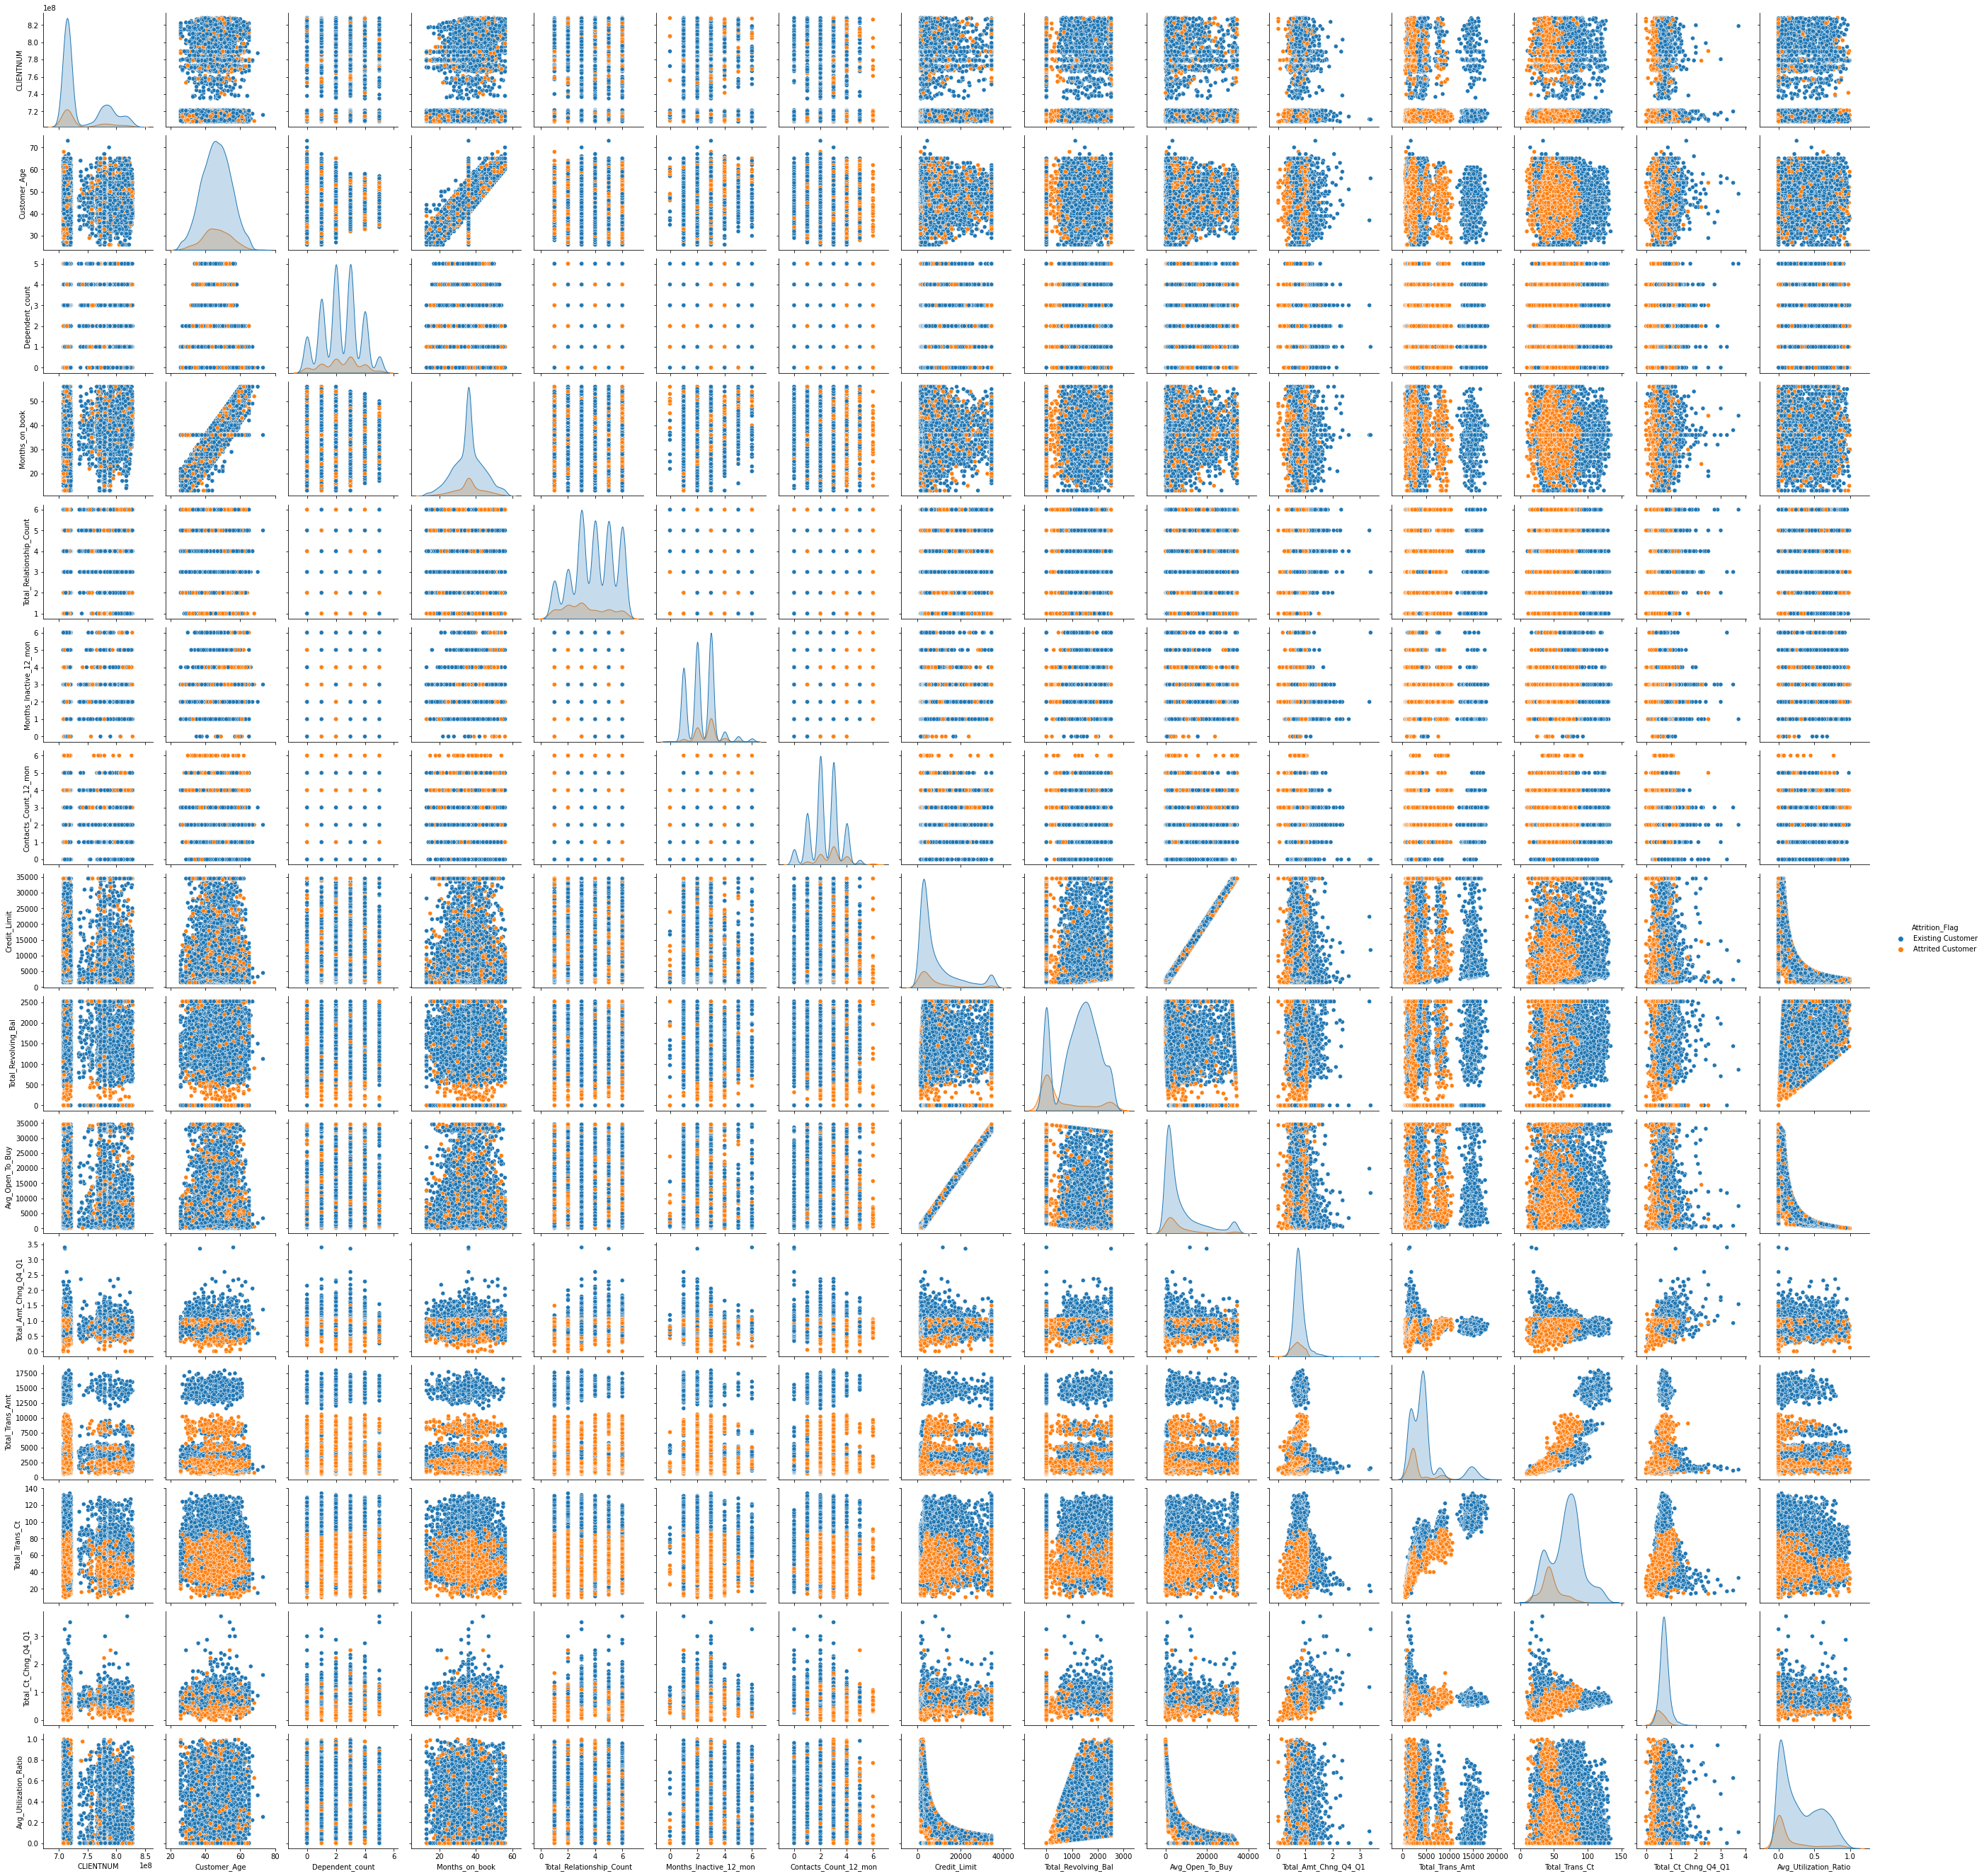

In [84]:
import seaborn as sns
sns.pairplot(df, hue='Attrition_Flag')

### Data Preprocessing 

In [85]:
from sklearn.preprocessing import MinMaxScaler
one_hot.drop('Attrition_Flag_Attrited Customer' ,axis=1, inplace=True)

import seaborn as sns
#sns.pairplot(one_hot, hue='Attrition_Flag_Existing Customer',x_vars = 'Customer_Age', y_vars = 'Total_Trans_Amt')
#sns.pairplot(one_hot, hue='Attrition_Flag_Existing Customer')

In [86]:
one_hot.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  7.081000e+03   7081.000000      7081.000000     7081.000000   
mean   7.390919e+08     46.347691         2.337805       35.981359   
std    3.685244e+07      8.041225         1.291649        8.002609   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130105e+08     41.000000         1.000000       31.000000   
50%    7.178438e+08     46.000000         2.000000       36.000000   
75%    7.732370e+08     52.000000         3.000000       40.000000   
max    8.282989e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count               7081.000000             7081.000000   
mean                   3.819376                2.342607   
std                    1.544444                0.995104   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count            7081.000000   7081.000000          7081.000000   
mean                2.454456   8492.773831          1167.501624   
std                 1.104917   9126.072520           812.315606   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2498.000000           463.000000   
50%                 2.000000   4287.000000          1282.000000   
75%                 3.000000  10729.000000          1781.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  ...  Income_Category_$120K +  \
count      7081.000000  ...              7081.000000   
mean       7325.272207  ...                 0.080780   
std        9131.217585  ...                 0.272516   
min           3.000000  ...                 0.000000   
25%        1248.000000  ...                 0.000000   
50%        3250.000000  ...                 0.000000   
75%        9491.000000  ...                 0.000000   
max       34516.000000  ...                 1.000000   

       Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
count                  7081.000000                  7081.000000   
mean                      0.199407                     0.155769   
std                       0.399583                     0.362662   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.000000                     0.000000   
max                       1.000000                     1.000000   

       Income_Category_$80K - $120K  Income_Category_Less than $40K  \
count                    7081.00000                     7081.000000   
mean                        0.16975                        0.394295   
std                         0.37544                        0.488733   
min                         0.00000                        0.000000   
25%                         0.00000                        0.000000   
50%                         0.00000                        0.000000   
75%                         0.00000                        1.000000   
max                         1.00000                        1.000000   

       Card_Category_Blue  Card_Category_Gold  Card_Category_Platinum  \
count         7081.000000         7081.000000             7081.000000   
mean             0.931789            0.011439                0.001553   
std              0.252125            0.106348                0.039386   
min              0.000000            0.000000                0.000000   
25%              1.000000            0.000000                0.000000   
50%              1.000000            0.000000           

    จากการตรวจสอบสถิติของข้อมูล จะพบว่าค่า min และ ค่าmax ของแต่ละฟีเจอร์มีขนาดแตกต่างกัน

## Data Preparation

    ลอง train model แรก โดยยังไม่ทำการ Scale ข้อมูล

Start Train

In [87]:
#import machine learning library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [88]:
#Data preparation
from sklearn.model_selection import train_test_split
#x = one_hot.loc[:,one_hot.columns != 'Attrition_Flag_Existing Customer' ].values
x = one_hot.iloc[:,0:-1]
y = one_hot['Attrition_Flag_Existing Customer'].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [89]:
# let's print the shape before we reshape and normalize
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (5664, 35)
y_train shape (5664,)
X_test shape (1417, 35)
y_test shape (1417,)


### Model Building

In [90]:
#Build linear regression model
model_logistic = LogisticRegression()
model_logistic.fit(x_train,y_train)

LogisticRegression()

### Results

In [91]:
#Predict on training set
y_pred = model_logistic.predict(x_train)
#Predict on test set
y_pred2 = model_logistic.predict(x_test)

In [92]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=y_train, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       907
           1       0.84      1.00      0.91      4757

    accuracy                           0.84      5664
   macro avg       0.42      0.50      0.46      5664
weighted avg       0.71      0.84      0.77      5664

Confusion matrix 
[[   0  907]
 [   0 4757]]


c:\Users\foke0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\foke0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\foke0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c:\Users\foke0\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


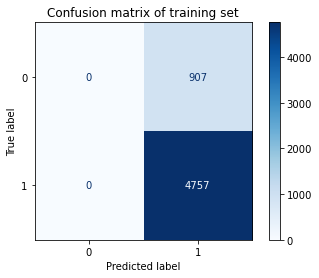

In [93]:
import matplotlib.pyplot as plt
# Plot confusion matrix of training set
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_logistic,
                      x_train,
                      y_train,
                      display_labels=list(set(y_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of training set')
plt.show() 

In [94]:
# Classification report of test set
print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred2))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred2))

Classification report 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       206
           1       0.85      1.00      0.92      1211

    accuracy                           0.85      1417
   macro avg       0.43      0.50      0.46      1417
weighted avg       0.73      0.85      0.79      1417

Confusion matrix 
[[   0  206]
 [   0 1211]]


c:\Users\foke0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\foke0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\foke0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c:\Users\foke0\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


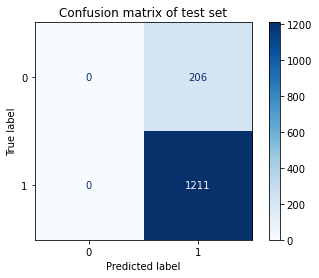

In [95]:
# Plot confusion matrix of test set
plot_confusion_matrix(model_logistic,
                      x_test,
                      y_test,
                      display_labels=list(set(y_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of test set')
plt.show() 

    0 คือข้อมูลของคนที่เลิกใช้บริการ

    1 คือข้อมูลของคนที่ยังใช้บริการ

## First Model Train with Scaler

Data Preparation

    ทำการ scale ข้อมูลให้เป็นข้อมูลที่มีค่าระหว่าง 0-1 แล้ว Train model แรกอีกครั้ง 

In [96]:
from sklearn.preprocessing import MinMaxScaler

# x = one_hot.loc[:,one_hot.columns != 'Attrition_Flag_Existing Customer' ].values
x = one_hot.iloc[:,0:-1]
y = one_hot['Attrition_Flag_Existing Customer'].values
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)


In [97]:
#Change Numpy.array to pandas(to use describe())
x_scaled = pd.DataFrame(x_scaled)       
x_scaled.describe()

0            1            2            3            4   \
count  7081.000000  7081.000000  7081.000000  7081.000000  7081.000000   
mean      0.257949     0.432930     0.467561     0.534450     0.563875   
std       0.306550     0.171090     0.258330     0.186107     0.308889   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.040996     0.319149     0.200000     0.418605     0.400000   
50%       0.081201     0.425532     0.400000     0.534884     0.600000   
75%       0.541978     0.553191     0.600000     0.627907     0.800000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                5            6            7            8            9   ...  \
count  7081.000000  7081.000000  7081.000000  7081.000000  7081.000000  ...   
mean      0.390434     0.409076     0.213270     0.463846     0.212160  ...   
std       0.165851     0.184153     0.275898     0.322732     0.264573  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.333333     0.333333     0.032037     0.183949     0.036073  ...   
50%       0.333333     0.333333     0.086121     0.509337     0.094080  ...   
75%       0.500000     0.500000     0.280875     0.707588     0.274911  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

                25           26           27           28          29  \
count  7081.000000  7081.000000  7081.000000  7081.000000  7081.00000   
mean      0.416325     0.080780     0.199407     0.155769     0.16975   
std       0.492984     0.272516     0.399583     0.362662     0.37544   
min       0.000000     0.000000     0.000000     0.000000     0.00000   
25%       0.000000     0.000000     0.000000     0.000000     0.00000   
50%       0.000000     0.000000     0.000000     0.000000     0.00000   
75%       1.000000     0.000000     0.000000     0.000000     0.00000   
max       1.000000     1.000000     1.000000     1.000000     1.00000   

                30           31           32           33           34  
count  7081.000000  7081.000000  7081.000000  7081.000000  7081.000000  
mean      0.394295     0.931789     0.011439     0.001553     0.055218  
std       0.488733     0.252125     0.106348     0.039386     0.228422  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     1.000000     0.000000     0.000000     0.000000  
50%       0.000000     1.000000     0.000000     0.000000     0.000000  
75%       1.000000     1.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 35 columns]

In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.1,random_state = 0)

In [99]:
# let's print the shape before we reshape and normalize
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (6372, 35)
y_train shape (6372,)
X_test shape (709, 35)
y_test shape (709,)


Model Building

In [100]:
#Build linear regression model
model_logistic = LogisticRegression()
model_logistic.fit(x_train,y_train)

c:\Users\foke0\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Results

In [101]:
#Predict on training set
y_pred = model_logistic.predict(x_train)
#Predict on test set
y_pred2 = model_logistic.predict(x_test)

In [102]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=y_train, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.80      0.52      0.63      1001
           1       0.92      0.98      0.95      5371

    accuracy                           0.90      6372
   macro avg       0.86      0.75      0.79      6372
weighted avg       0.90      0.90      0.90      6372

Confusion matrix 
[[ 522  479]
 [ 129 5242]]


c:\Users\foke0\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


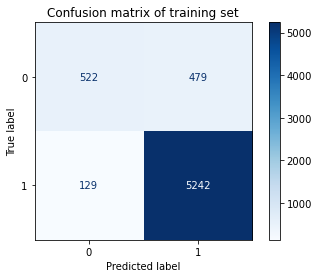

In [103]:
# Plot confusion matrix of training set
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_logistic,
                      x_train,
                      y_train,
                      display_labels=list(set(y_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of training set')
plt.show()

In [104]:
# Classification report of test set
print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred2))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred2))

Classification report 
              precision    recall  f1-score   support

           0       0.75      0.45      0.56       112
           1       0.90      0.97      0.94       597

    accuracy                           0.89       709
   macro avg       0.82      0.71      0.75       709
weighted avg       0.88      0.89      0.88       709

Confusion matrix 
[[ 50  62]
 [ 17 580]]


c:\Users\foke0\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


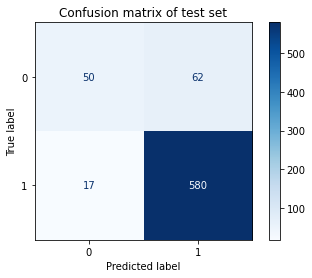

In [105]:
# Plot confusion matrix of test set
plot_confusion_matrix(model_logistic,
                      x_test,
                      y_test,
                      display_labels=list(set(y_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of test set')
plt.show() 

## Second Train Model

Data Preprocessing Delete Numerical value

    ในการ train ครั้งที่สองจะทำการตัด Feature ที่ไม่จำเป็นต่อการนำมาวิเคราะห์

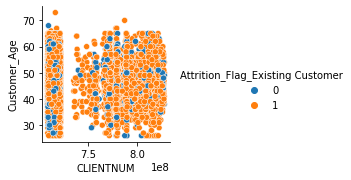

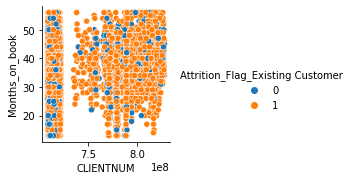

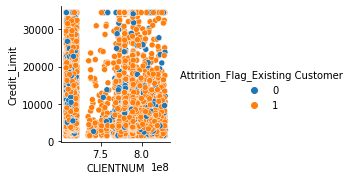

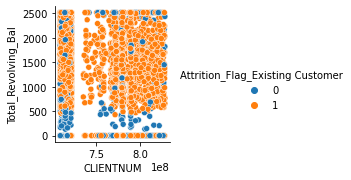

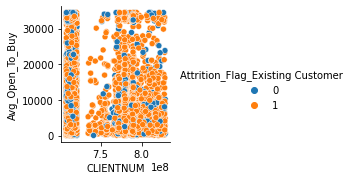

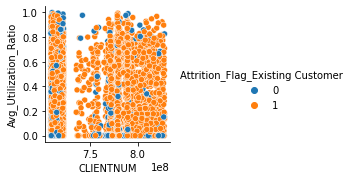

In [106]:
import seaborn as sns
sns.pairplot(one_hot, hue='Attrition_Flag_Existing Customer',x_vars = 'CLIENTNUM', y_vars = 'Customer_Age')
sns.pairplot(one_hot, hue='Attrition_Flag_Existing Customer',x_vars = 'CLIENTNUM', y_vars = 'Months_on_book')
sns.pairplot(one_hot, hue='Attrition_Flag_Existing Customer',x_vars = 'CLIENTNUM', y_vars = 'Credit_Limit')
sns.pairplot(one_hot, hue='Attrition_Flag_Existing Customer',x_vars = 'CLIENTNUM', y_vars = 'Total_Revolving_Bal')
sns.pairplot(one_hot, hue='Attrition_Flag_Existing Customer',x_vars = 'CLIENTNUM', y_vars = 'Avg_Open_To_Buy')
sns.pairplot(one_hot, hue='Attrition_Flag_Existing Customer',x_vars = 'CLIENTNUM', y_vars = 'Avg_Utilization_Ratio')
one_hot.drop('CLIENTNUM' ,axis=1, inplace=True)

    โดย feature แรกที่เลือกจะตัดเลยก็คือ CLIENTNUM ซึ่งเป็น ID ของลูกค้า โดยจากกราฟ pairplot จะเห็นได้ว่าข้อมูลของลูกค้าที่ใช้งานอยู่และลูกค้าที่เลิกใช้งาน มีการกระจายตัวปะปนกันมากเกินไป ไม่มีการเกาะกลุ่มกัน และไม่มีความสัมพันธ์กับ feature อื่นๆดังตัวอย่างที่ยกมาให้ จึงเลือกที่จะตัดออก

Data Preparation

In [107]:
#Data preparation

from sklearn.model_selection import train_test_split
# x = one_hot.loc[:,one_hot.columns != 'Attrition_Flag_Existing Customer' ].values
x = one_hot.iloc[:,0:-1]
y = one_hot['Attrition_Flag_Existing Customer'].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state = 0)

Model Building

In [108]:
#Build linear regression model
model_logistic = LogisticRegression()
model_logistic.fit(x_train,y_train)

c:\Users\foke0\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Result

In [109]:
#Predict on training set
y_pred = model_logistic.predict(x_train)
#Predict on test set
y_pred2 = model_logistic.predict(x_test)

In [110]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=y_train, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.82      0.54      0.65       907
           1       0.92      0.98      0.95      4757

    accuracy                           0.91      5664
   macro avg       0.87      0.76      0.80      5664
weighted avg       0.90      0.91      0.90      5664

Confusion matrix 
[[ 489  418]
 [ 110 4647]]


c:\Users\foke0\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


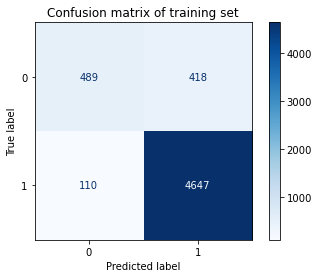

In [111]:
import matplotlib.pyplot as plt
# Plot confusion matrix of training set
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_logistic,
                      x_train,
                      y_train,
                      display_labels=list(set(y_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of training set')
plt.show() 

In [112]:
# Classification report of test set
print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred2))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred2))

Classification report 
              precision    recall  f1-score   support

           0       0.71      0.43      0.54       206
           1       0.91      0.97      0.94      1211

    accuracy                           0.89      1417
   macro avg       0.81      0.70      0.74      1417
weighted avg       0.88      0.89      0.88      1417

Confusion matrix 
[[  89  117]
 [  36 1175]]


c:\Users\foke0\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


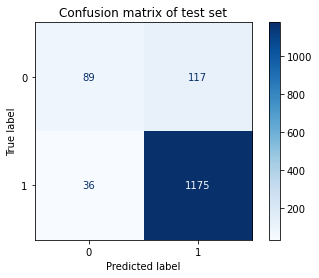

In [113]:
# Plot confusion matrix of test set
plot_confusion_matrix(model_logistic,
                      x_test,
                      y_test,
                      display_labels=list(set(y_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of test set')
plt.show() 

## Third Train Model

Data Preprocessing Delete Numerical value

    ในการ train ครั้งที่สามจะทำการตัด Feature ที่ไม่จำเป็นต่อการนำมาวิเคราะห์เพิ่มเติม

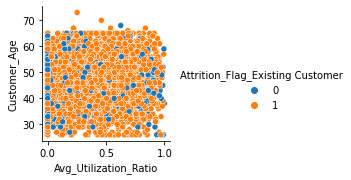

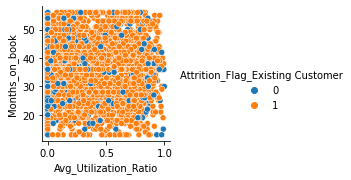

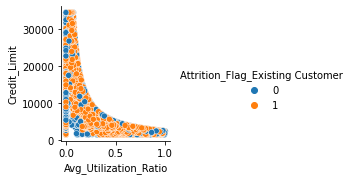

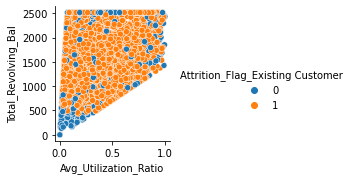

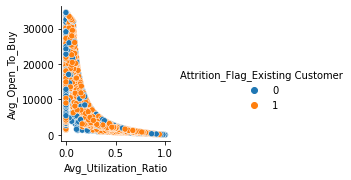

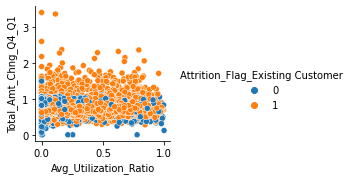

In [114]:
import seaborn as sns
sns.pairplot(one_hot, hue='Attrition_Flag_Existing Customer',x_vars = 'Avg_Utilization_Ratio', y_vars = 'Customer_Age')
sns.pairplot(one_hot, hue='Attrition_Flag_Existing Customer',x_vars = 'Avg_Utilization_Ratio', y_vars = 'Months_on_book')
sns.pairplot(one_hot, hue='Attrition_Flag_Existing Customer',x_vars = 'Avg_Utilization_Ratio', y_vars = 'Credit_Limit')
sns.pairplot(one_hot, hue='Attrition_Flag_Existing Customer',x_vars = 'Avg_Utilization_Ratio', y_vars = 'Total_Revolving_Bal')
sns.pairplot(one_hot, hue='Attrition_Flag_Existing Customer',x_vars = 'Avg_Utilization_Ratio', y_vars = 'Avg_Open_To_Buy')
sns.pairplot(one_hot, hue='Attrition_Flag_Existing Customer',x_vars = 'Avg_Utilization_Ratio', y_vars = 'Total_Amt_Chng_Q4_Q1')
one_hot.drop('Avg_Utilization_Ratio' ,axis=1, inplace=True)

    โดยในครั้งนี้เลือกที่จะตัด feature Avg_Utilization_Ratio โดยจากกราฟ pairplot จะเห็นได้ว่าข้อมูลมีการกระจายตัวปะปนกัน ไม่เกาะกลุ่มกัน และไม่มีความสัมพันธ์กับ feature อื่นๆดังตัวอย่างที่ยกมาให้ จึงเลือกที่จะตัดออก

Data Preprocessing

In [115]:
#Data preparation
from sklearn.model_selection import train_test_split
# x = one_hot.loc[:,one_hot.columns != 'Attrition_Flag_Existing Customer' ].values
x = one_hot.iloc[:,0:-1]
y = one_hot['Attrition_Flag_Existing Customer'].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state = 0)

Model Building

In [116]:
#Build linear regression model
model_logistic = LogisticRegression()
model_logistic.fit(x_train,y_train)

c:\Users\foke0\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Result

In [117]:
#Predict on training set
y_pred = model_logistic.predict(x_train)
#Predict on test set
y_pred2 = model_logistic.predict(x_test)

In [118]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=y_train, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.81      0.54      0.65       907
           1       0.92      0.98      0.95      4757

    accuracy                           0.91      5664
   macro avg       0.86      0.76      0.80      5664
weighted avg       0.90      0.91      0.90      5664

Confusion matrix 
[[ 486  421]
 [ 112 4645]]


c:\Users\foke0\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


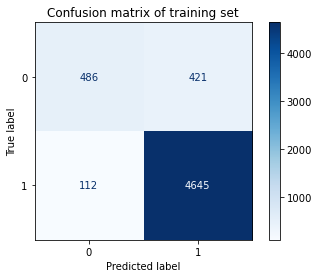

In [119]:
import matplotlib.pyplot as plt
# Plot confusion matrix of training set
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_logistic,
                      x_train,
                      y_train,
                      display_labels=list(set(y_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of training set')
plt.show() 

In [120]:
# Classification report of test set
print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred2))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred2))

Classification report 
              precision    recall  f1-score   support

           0       0.69      0.43      0.53       206
           1       0.91      0.97      0.94      1211

    accuracy                           0.89      1417
   macro avg       0.80      0.70      0.73      1417
weighted avg       0.88      0.89      0.88      1417

Confusion matrix 
[[  89  117]
 [  40 1171]]


c:\Users\foke0\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


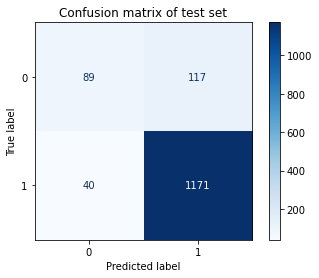

In [121]:
# Plot confusion matrix of test set
plot_confusion_matrix(model_logistic,
                      x_test,
                      y_test,
                      display_labels=list(set(y_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of test set')
plt.show() 

In [122]:
import seaborn as sns
#sns.pairplot(one_hot, hue='Attrition_Flag_Existing Customer')

## Fourth Train Model

Data Preprocessing Delete classification value

In [123]:
print(one_hot.columns)

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Gender_F', 'Gender_M',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum',
       'Card_Category_Silver', 'Attrition_Flag_Existing Customer'],
      dtype='object')


In [124]:
FindCorrelation = one_hot.loc[:,:].dropna()#หาค่าความสัมพันธ์ของตัวแปร
FindCorrelation.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
4            40                3              21                         5   
5            44                2              36                         3   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
4                       1                      0        4716.0   
5                       1                      2        4010.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  \
0                  777          11914.0                 1.335  ...   
1                  864           7392.0                 1.541  ...   
2                    0           3418.0                 2.594  ...   
4                    0           4716.0                 2.175  ...   
5                 1247           2763.0                 1.376  ...   

   Income_Category_$120K +  Income_Category_$40K - $60K  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
4                        0                            0   
5                        0                            1   

   Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
0                            1                             0   
1                            0                             0   
2                            0                             1   
4                            1                             0   
5                            0                             0   

   Income_Category_Less than $40K  Card_Category_Blue  Card_Category_Gold  \
0                               0                   1                   0   
1                               1                   1                   0   
2                               0                   1                   0   
4                               0                   1                   0   
5                               0                   1                   0   

   Card_Category_Platinum  Card_Category_Silver  \
0                       0                     0   
1                       0                     0   
2                       0                     0   
4                       0                     0   
5                       0                     0   

   Attrition_Flag_Existing Customer  
0                                 1  
1                                 1  
2                                 1  
4                                 1  
5                                 1  

[5 rows x 34 columns]

In [125]:
FindCorrelation.corr()      #corr funtion can't find the correlation that is not the same type

Customer_Age  Dependent_count  \
Customer_Age                          1.000000        -0.128232   
Dependent_count                      -0.128232         1.000000   
Months_on_book                        0.791271        -0.112368   
Total_Relationship_Count             -0.022067        -0.043257   
Months_Inactive_12_mon                0.057870        -0.022804   
Contacts_Count_12_mon                -0.023971        -0.055625   
Credit_Limit                          0.024563         0.081379   
Total_Revolving_Bal                   0.016325        -0.003832   
Avg_Open_To_Buy                       0.023097         0.081674   
Total_Amt_Chng_Q4_Q1                 -0.068976        -0.033320   
Total_Trans_Amt                      -0.045859         0.023236   
Total_Trans_Ct                       -0.069883         0.057056   
Total_Ct_Chng_Q4_Q1                  -0.017599         0.019081   
Gender_F                              0.010569        -0.008121   
Gender_M                             -0.010569         0.008121   
Education_Level_College              -0.011245         0.013462   
Education_Level_Doctorate             0.026417        -0.007952   
Education_Level_Graduate             -0.003787         0.008795   
Education_Level_High School           0.008855        -0.017678   
Education_Level_Post-Graduate        -0.023570         0.007046   
Education_Level_Uneducated            0.004179        -0.002829   
Marital_Status_Divorced              -0.045991         0.012786   
Marital_Status_Married                0.043201         0.025163   
Marital_Status_Single                -0.018456        -0.032574   
Income_Category_$120K +               0.053827         0.032412   
Income_Category_$40K - $60K          -0.018767        -0.015046   
Income_Category_$60K - $80K          -0.022497         0.022132   
Income_Category_$80K - $120K          0.012308         0.047172   
Income_Category_Less than $40K       -0.007431        -0.058431   
Card_Category_Blue                    0.005081        -0.038098   
Card_Category_Gold                   -0.005643         0.031503   
Card_Category_Platinum                0.000524         0.003565   
Card_Category_Silver                 -0.003072         0.026769   
Attrition_Flag_Existing Customer     -0.008735        -0.011423   

                                  Months_on_book  Total_Relationship_Count  \
Customer_Age                            0.791271                 -0.022067   
Dependent_count                        -0.112368                 -0.043257   
Months_on_book                          1.000000                 -0.016751   
Total_Relationship_Count               -0.016751                  1.000000   
Months_Inactive_12_mon                  0.071305                  0.005072   
Contacts_Count_12_mon                  -0.011054                  0.070539   
Credit_Limit                            0.020103                 -0.074876   
Total_Revolving_Bal                     0.007884                  0.014313   
Avg_Open_To_Buy                         0.019391                 -0.076107   
Total_Amt_Chng_Q4_Q1                   -0.059865                  0.053147   
Total_Trans_Amt                        -0.037625                 -0.348024   
Total_Trans_Ct                         -0.050445                 -0.246749   
Total_Ct_Chng_Q4_Q1                    -0.028528                  0.036900   
Gender_F                                0.003813                  0.004505   
Gender_M                               -0.003813                 -0.004505   
Education_Level_College                -0.006660                 -0.014550   
Education_Level_Doctorate               0.020031                 -0.012662   
Education_Level_Graduate                0.000707                  0.002278   
Education_Level_High School             0.009671                  0.005960   
Education_Level_Post-Graduate          -0.019337                  0.012947   
Education_Level_Uneducated             -0.005429  

    เลือกใช้ฟังก์ชั่น SelectKBest เพื่อหาค่า feature ที่มีความสัมพันธ์กกันมากที่สุด โดยใช้ chi2 เป็นตัวหาความสัมพันธ์ 

In [126]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# x = one_hot.loc[:,one_hot.columns != 'Attrition_Flag_Existing Customer' ].values
x = one_hot.iloc[:,0:-1]
y = one_hot['Attrition_Flag_Existing Customer'].values


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

selector = SelectKBest(chi2, k=4) 
x_new = selector.fit(x_scaled,y)

col = selector.get_support(indices=True)   #all indices are saved in col.
x_scaled = pd.DataFrame(x_scaled)
x_new = x_scaled.iloc[:,col]


    โดยใน SelectKBest เราเลือกใช้ k = 4 เนื่องจาก เราต้องการหา keyfeature ของ dataset นี้

In [127]:
x_new.head() #Feature are Total_Relationship_Count,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct

3         7         10        11
0  0.8  0.308701  0.036260  0.258065
1  1.0  0.343266  0.044667  0.185484
2  0.6  0.000000  0.078753  0.080645
3  0.8  0.000000  0.017501  0.145161
4  0.4  0.495431  0.033057  0.112903

    SelectKBest ได้เลือกมาให้ 4 keyfeature โดยประกอบไปด้วย Total_Relationship_Count,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct

Data Preprocessing

    จึงได้นำ 4 feature ที่ SelectKBest เลือก นำมาเป็นตัว train

In [128]:
x = one_hot[['Total_Relationship_Count','Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct']].values
y = one_hot['Attrition_Flag_Existing Customer'].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state = 0)

Model Building

In [129]:
#Build linear regression model
model_logistic = LogisticRegression()
model_logistic.fit(x_train,y_train)

LogisticRegression()

Result

In [130]:
#Predict on training set
y_pred = model_logistic.predict(x_train)
#Predict on test set
y_pred2 = model_logistic.predict(x_test)

In [131]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=y_train, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.76      0.42      0.54       907
           1       0.90      0.97      0.93      4757

    accuracy                           0.89      5664
   macro avg       0.83      0.70      0.74      5664
weighted avg       0.88      0.89      0.87      5664

Confusion matrix 
[[ 381  526]
 [ 123 4634]]


c:\Users\foke0\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


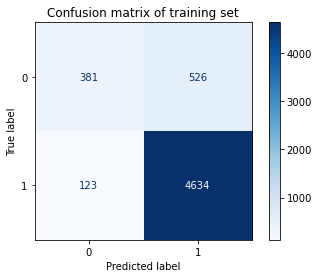

In [132]:
import matplotlib.pyplot as plt
# Plot confusion matrix of training set
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_logistic,
                      x_train,
                      y_train,
                      display_labels=list(set(y_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of training set')
plt.show() 

In [133]:
# Classification report of test set
print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred2))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred2))

Classification report 
              precision    recall  f1-score   support

           0       0.76      0.36      0.49       206
           1       0.90      0.98      0.94      1211

    accuracy                           0.89      1417
   macro avg       0.83      0.67      0.71      1417
weighted avg       0.88      0.89      0.87      1417

Confusion matrix 
[[  74  132]
 [  23 1188]]


c:\Users\foke0\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


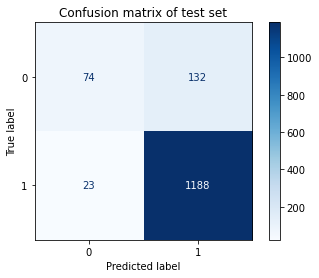

In [134]:
# Plot confusion matrix of test set
plot_confusion_matrix(model_logistic,
                      x_test,
                      y_test,
                      display_labels=list(set(y_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of test set')
plt.show() 

## Fifth Train Model

    การทำโมเดลในครั้งที่ 5 เพื่อเทียบว่าถ้าเราเพิ่ม feature เข้าไปอีกจะส่งผลให้การคาดการณ์ของโมเดลมีการเปลี่ยนแปลงหรือไม่

In [135]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# x = one_hot.loc[:,one_hot.columns != 'Attrition_Flag_Existing Customer' ].values
x = one_hot.iloc[:,0:-1]
y = one_hot['Attrition_Flag_Existing Customer'].values


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

selector = SelectKBest(chi2, k=10)
x_new = selector.fit(x_scaled,y)

col = selector.get_support(indices=True)   #all indices are saved in col.
x_scaled = pd.DataFrame(x_scaled)
x_new = x_scaled.iloc[:,col]


In [136]:
x_new.head() 

3         4         5         7         10        11        12   13   16  \
0  0.8  0.166667  0.500000  0.308701  0.036260  0.258065  0.437534  0.0  0.0   
1  1.0  0.166667  0.333333  0.343266  0.044667  0.185484  1.000000  1.0  0.0   
2  0.6  0.166667  0.000000  0.000000  0.078753  0.080645  0.628164  0.0  0.0   
3  0.8  0.166667  0.000000  0.000000  0.017501  0.145161  0.673129  0.0  0.0   
4  0.4  0.166667  0.333333  0.495431  0.033057  0.112903  0.227787  0.0  0.0   

    26  
0  1.0  
1  0.0  
2  0.0  
3  1.0  
4  0.0

In [137]:
print(one_hot.columns) #Feature are Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Gender_F,Education_Level_Doctorate,Income_Category_$60K - $80K

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Gender_F', 'Gender_M',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum',
       'Card_Category_Silver', 'Attrition_Flag_Existing Customer'],
      dtype='object')


Data Processing

In [138]:
x = one_hot[['Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Gender_F','Education_Level_Doctorate','Income_Category_$60K - $80K']].values
y = one_hot['Attrition_Flag_Existing Customer'].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state = 0)

Model Building

In [139]:
#Build linear regression model
model_logistic = LogisticRegression()
model_logistic.fit(x_train,y_train)

LogisticRegression()

Result

In [140]:
#Predict on training set
y_pred = model_logistic.predict(x_train)
#Predict on test set
y_pred2 = model_logistic.predict(x_test)

In [141]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=y_train, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.81      0.52      0.63       907
           1       0.91      0.98      0.94      4757

    accuracy                           0.90      5664
   macro avg       0.86      0.75      0.79      5664
weighted avg       0.90      0.90      0.89      5664

Confusion matrix 
[[ 470  437]
 [ 113 4644]]


c:\Users\foke0\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


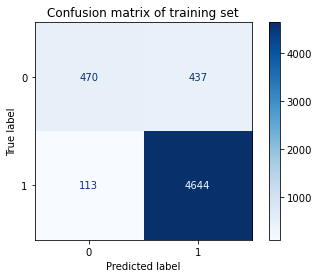

In [142]:
import matplotlib.pyplot as plt
# Plot confusion matrix of training set
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_logistic,
                      x_train,
                      y_train,
                      display_labels=list(set(y_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of training set')
plt.show() 

In [143]:
# Classification report of test set
print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred2))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred2))

Classification report 
              precision    recall  f1-score   support

           0       0.70      0.41      0.52       206
           1       0.91      0.97      0.94      1211

    accuracy                           0.89      1417
   macro avg       0.80      0.69      0.73      1417
weighted avg       0.88      0.89      0.88      1417

Confusion matrix 
[[  84  122]
 [  36 1175]]


c:\Users\foke0\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


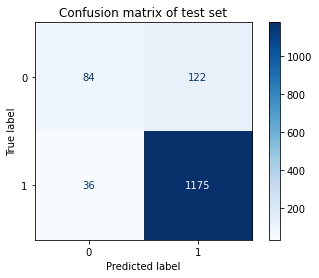

In [144]:
# Plot confusion matrix of test set
plot_confusion_matrix(model_logistic,
                      x_test,
                      y_test,
                      display_labels=list(set(y_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of test set')
plt.show() 

## Sixth Train Model

    การทำโมเดลในครั้งที่ 6 เพื่อเทียบว่าถ้าเราเพิ่ม feature เข้าไปอีกจะทำให้การคาดการณ์ของโมเดลมีการเปลี่ยนแปลงหรือไม่

In [145]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# x = one_hot.loc[:,one_hot.columns != 'Attrition_Flag_Existing Customer' ].values
x = one_hot.iloc[:,0:-1]
y = one_hot['Attrition_Flag_Existing Customer'].values


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

selector = SelectKBest(chi2, k=13)
x_new = selector.fit(x_scaled,y)

col = selector.get_support(indices=True)   #all indices are saved in col.
x_scaled = pd.DataFrame(x_scaled)
x_new = x_scaled.iloc[:,col]

In [146]:
x_new.head() 

3         4         5         7         9         10        11        12  \
0  0.8  0.166667  0.500000  0.308701  0.392994  0.036260  0.258065  0.437534   
1  1.0  0.166667  0.333333  0.343266  0.453636  0.044667  0.185484  1.000000   
2  0.6  0.166667  0.000000  0.000000  0.763615  0.078753  0.080645  0.628164   
3  0.8  0.166667  0.000000  0.000000  0.640271  0.017501  0.145161  0.673129   
4  0.4  0.166667  0.333333  0.495431  0.405063  0.033057  0.112903  0.227787   

    13   14   16   26   28  
0  0.0  1.0  0.0  1.0  0.0  
1  1.0  0.0  0.0  0.0  1.0  
2  0.0  1.0  0.0  0.0  0.0  
3  0.0  1.0  0.0  1.0  0.0  
4  0.0  1.0  0.0  0.0  0.0

In [147]:
print(one_hot.columns) #Feature are Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Gender_F,Education_Level_Doctorate,Income_Category_$60K - $80K,Total_Amt_Chng_Q4_Q1,Gender_M,Income_Category_Less than $40K

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Gender_F', 'Gender_M',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum',
       'Card_Category_Silver', 'Attrition_Flag_Existing Customer'],
      dtype='object')


Data Processing

In [148]:
x = one_hot[['Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Gender_F','Education_Level_Doctorate','Income_Category_$60K - $80K','Total_Amt_Chng_Q4_Q1','Gender_M','Income_Category_Less than $40K']].values
y = one_hot['Attrition_Flag_Existing Customer'].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state = 0)

Model Building

In [149]:
#Build linear regression model
model_logistic = LogisticRegression()
model_logistic.fit(x_train,y_train)

LogisticRegression()

Result

In [150]:
#Predict on training set
y_pred = model_logistic.predict(x_train)
#Predict on test set
y_pred2 = model_logistic.predict(x_test)

In [151]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=y_train, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.80      0.52      0.63       907
           1       0.91      0.98      0.94      4757

    accuracy                           0.90      5664
   macro avg       0.86      0.75      0.79      5664
weighted avg       0.90      0.90      0.89      5664

Confusion matrix 
[[ 470  437]
 [ 116 4641]]


c:\Users\foke0\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


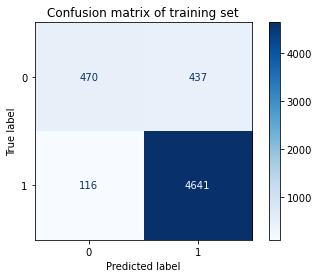

In [152]:
import matplotlib.pyplot as plt
# Plot confusion matrix of training set
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_logistic,
                      x_train,
                      y_train,
                      display_labels=list(set(y_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of training set')
plt.show()

In [153]:
# Classification report of test set
print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred2))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred2))

Classification report 
              precision    recall  f1-score   support

           0       0.71      0.41      0.52       206
           1       0.91      0.97      0.94      1211

    accuracy                           0.89      1417
   macro avg       0.81      0.69      0.73      1417
weighted avg       0.88      0.89      0.88      1417

Confusion matrix 
[[  85  121]
 [  35 1176]]


c:\Users\foke0\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


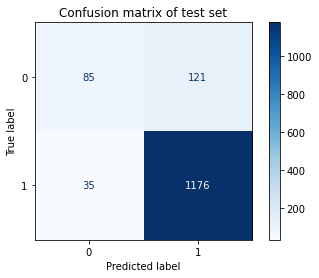

In [154]:
# Plot confusion matrix of test set
plot_confusion_matrix(model_logistic,
                      x_test,
                      y_test,
                      display_labels=list(set(y_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of test set')
plt.show() 

#### ผลสรุป



**หลังจากที่เราทำการเพิ่ม feature จาก 10 feature เป็น 13 feature ทำให้เราได้พบว่า ค่า precision recall และ F1-Score มีการเปลี่ยนแปลงนิดเดียว กล่าวคือ feature นอกจากนี้เป็น feature ที่ไม่จำเป็นต่อการนำมาวิเคราะห์**